In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/hearing_test.csv')

In [4]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [5]:
df.describe()

age  physical_score  test_result
count  5000.000000     5000.000000  5000.000000
mean     51.609000       32.760260     0.600000
std      11.287001        8.169802     0.489947
min      18.000000       -0.000000     0.000000
25%      43.000000       26.700000     0.000000
50%      51.000000       35.300000     1.000000
75%      60.000000       38.900000     1.000000
max      90.000000       50.000000     1.000000

In [8]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='age'>

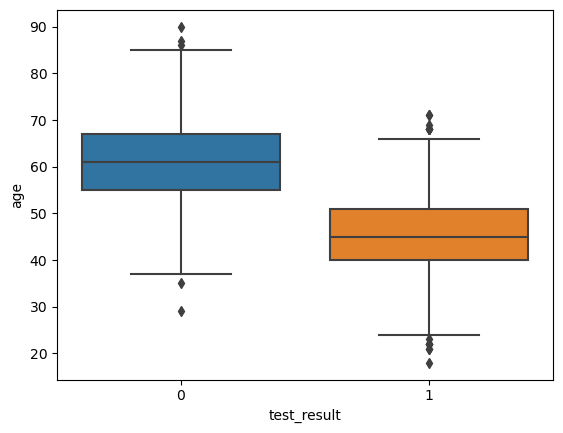

In [10]:
sns.boxplot(data=df, x='test_result', y='age')

In [12]:
#sns.boxplot(data=df, x='age', y='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

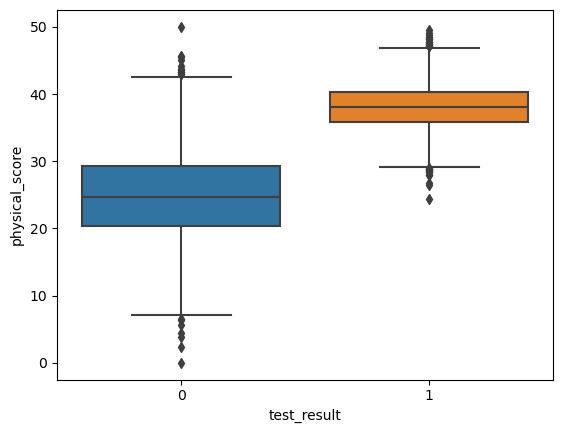

In [13]:
sns.boxplot(data=df, x='test_result', y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

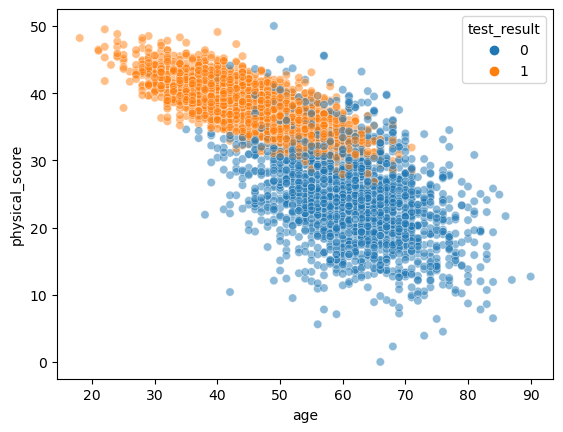

In [18]:
sns.scatterplot(data=df,x='age', y='physical_score', hue='test_result', alpha=0.5)

C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BRAVO15\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

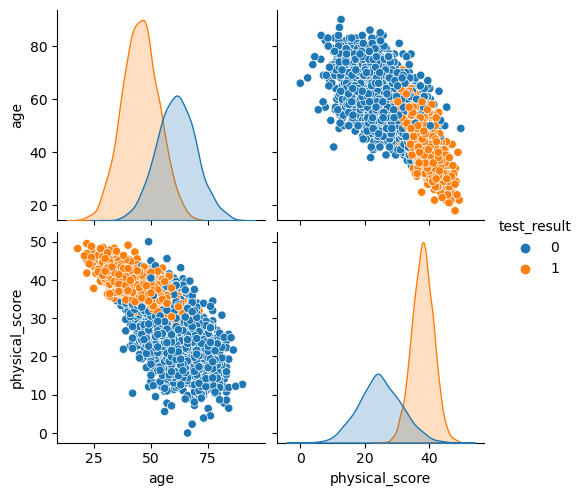

In [20]:
sns.pairplot(data=df, hue='test_result')

In [21]:
df.corr()

age  physical_score  test_result
age             1.000000       -0.782146    -0.683171
physical_score -0.782146        1.000000     0.792716
test_result    -0.683171        0.792716     1.000000

<Axes: >

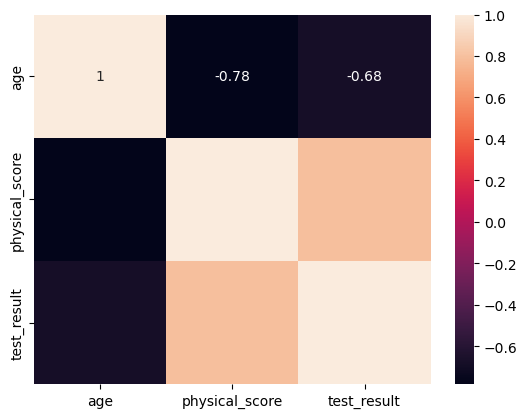

In [24]:
sns.heatmap(df.corr(),annot=True )

In [28]:
from mpl_toolkits.mplot3d import Axes3D

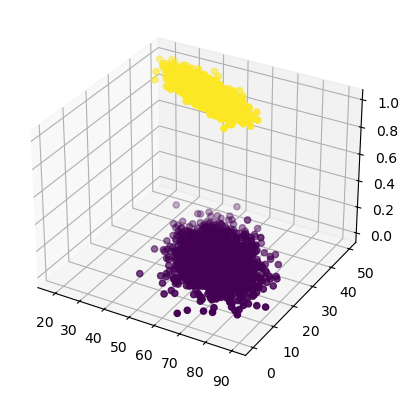

In [34]:
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter('age', 'physical_score','test_result',data=df,c='test_result')

In [35]:
X= df.drop('test_result', axis=1)

In [36]:
y=df['test_result']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.preprocessing import StandardScaler

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler=StandardScaler()
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
#help(LogisticRegression)

In [44]:
log_model=LogisticRegression()

In [45]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [46]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [49]:
y_pred=log_model.predict(scaled_X_test)

In [53]:
#y_pred

In [51]:
y_pred=log_model.predict_proba(scaled_X_test)

In [54]:
#y_pred

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
y_pred=log_model.predict(scaled_X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.93

In [61]:
cm=confusion_matrix(y_test, y_pred)

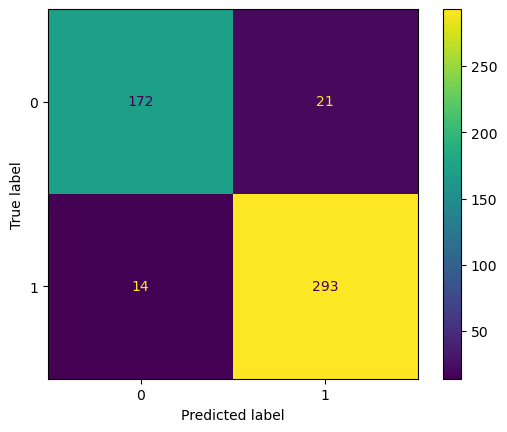

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [68]:
from sklearn.metrics import precision_score, recall_score

In [69]:
precision_score(y_test,y_pred)

0.9331210191082803

In [71]:
recall_score(y_test,y_pred)

0.9543973941368078

In [77]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_curve, auc

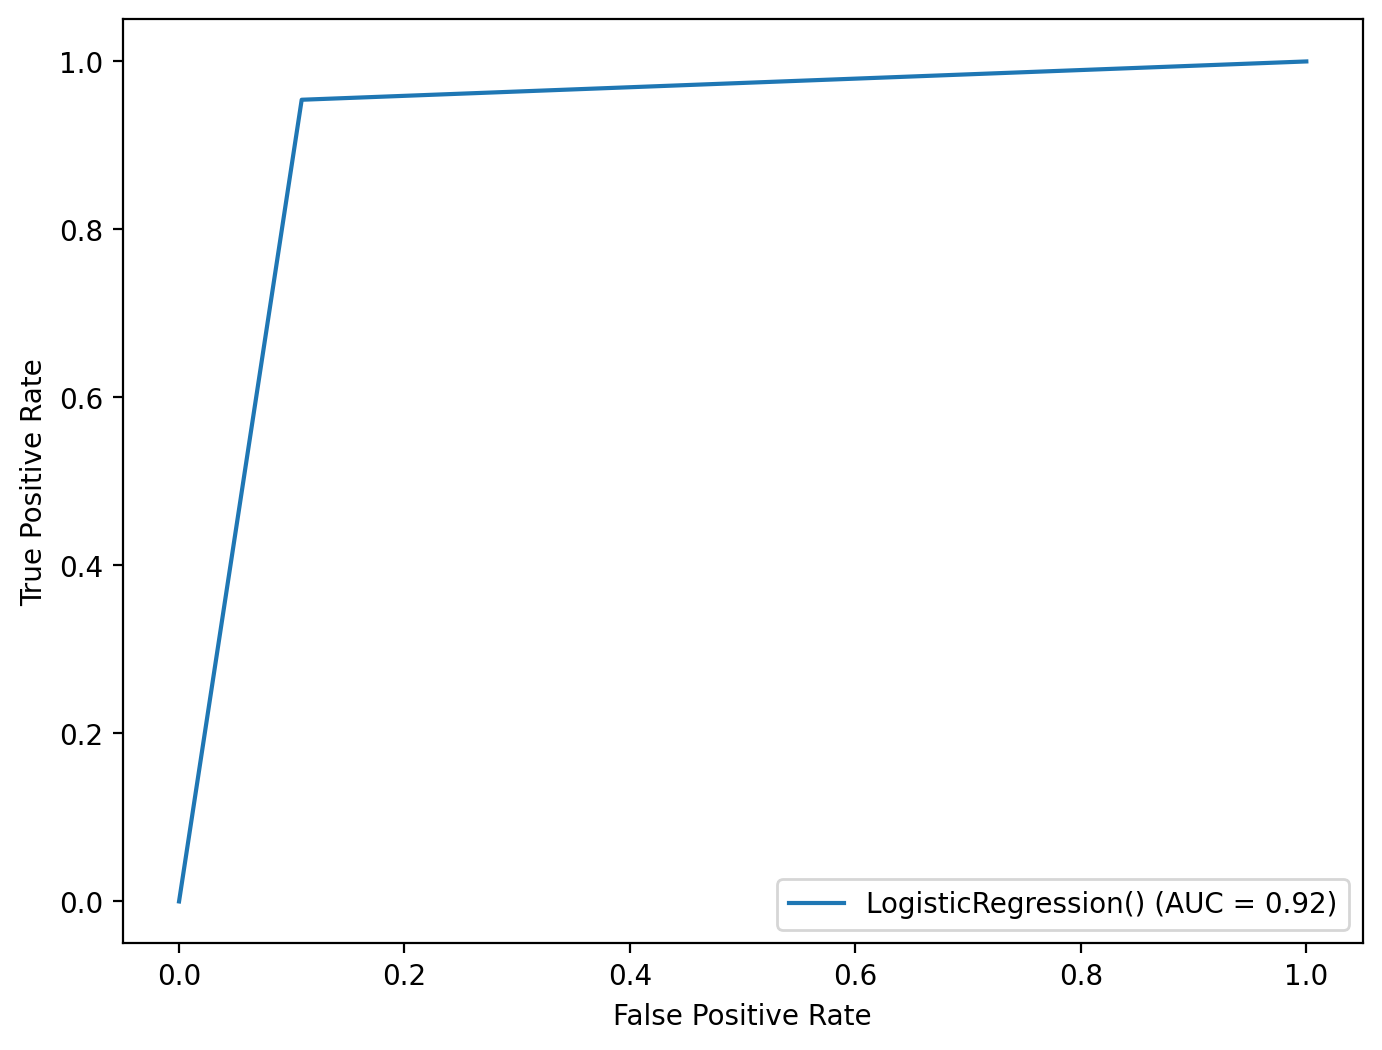

In [85]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
fpr, tpr, threshold=roc_curve(y_test, y_pred)
roc_auc=auc(fpr,tpr)
dis= RocCurveDisplay(fpr=fpr, tpr=tpr,estimator_name=log_model,roc_auc=roc_auc)
dis.plot(ax=ax)
plt.show()

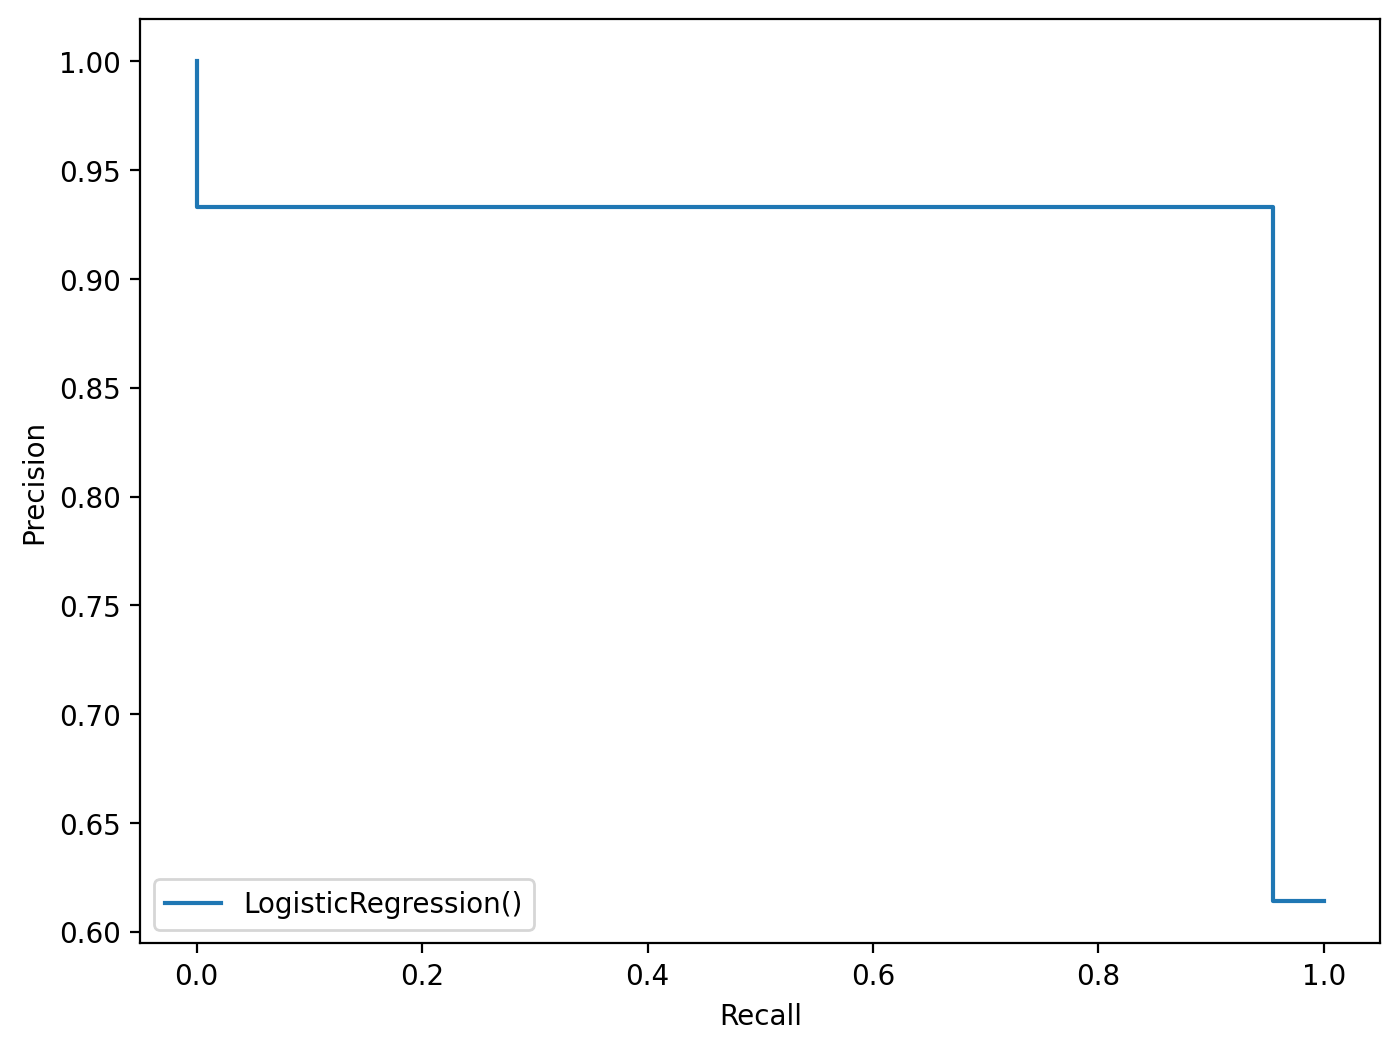

In [93]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
precision, recall, threshold=precision_recall_curve(y_test,y_pred)
dis=PrecisionRecallDisplay(precision=precision,recall=recall,estimator_name=log_model)
dis.plot(ax=ax)
plt.show()